# Initialising the values

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of arms
n = 10

# Define the number of bandit problems/tasks
tasks = 2000

# Define the number of plays for each bandit problem/task
plays = 2000

# Initialize the true action values for all bandit problems/tasks
true_action_values = np.random.normal(0, 1, (tasks, n))

# Initialize the estimated action values for all bandit problems/tasks
estimated_action_values = np.zeros((tasks, n))

# Initialize the number of times each action is selected for all bandit problems/tasks
action_counts = np.zeros((tasks, n))

# Initialize epsilon for the epsilon-greedy algorithm
epsilon = 0.1

# Initialize arrays to store the average reward and optimal action percentage over plays
average_rewards = np.zeros(plays)
optimal_action_percentages = np.zeros(plays)

# Perform the bandit algorithm for each bandit problem/task
for t in range(tasks):
    for play in range(plays):
        # Select an action for the epsilon-greedy algorithm
        if np.random.rand() < epsilon:
            # Explore: select a random action
            action = np.random.choice(n)
        else:
            # Exploit: select the action with the highest estimated value
            action = np.argmax(estimated_action_values[t])

        # Check if the selected action is the optimal action
        optimal_action = action == np.argmax(true_action_values[t])

        # Get the reward for the selected action
        reward = np.random.normal(true_action_values[t, action], 1)

        # Update the estimated action value for the selected action
        action_counts[t, action] += 1
        estimated_action_values[t, action] += (reward - estimated_action_values[t, action]) / action_counts[t, action]

        # Update the average reward and optimal action percentage arrays
        average_rewards[play] += (reward - average_rewards[play]) / (t + 1)
        optimal_action_percentages[play] += (optimal_action - optimal_action_percentages[play]) / (t + 1)

# Plot the results

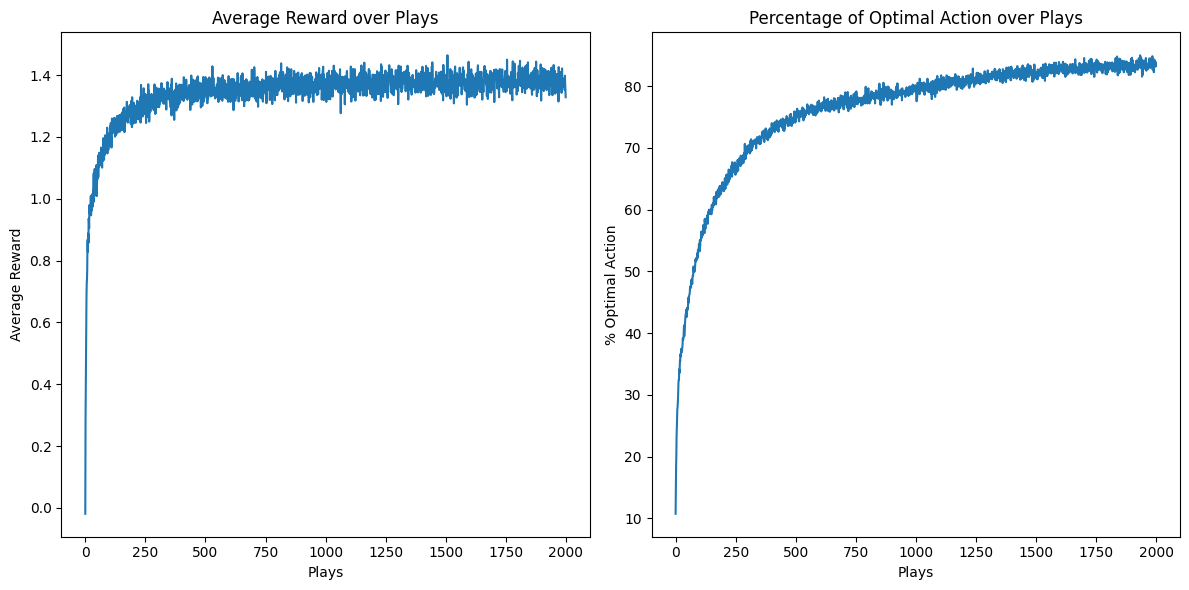

In [2]:
plt.figure(figsize=(12, 6))

# Plot the average reward
plt.subplot(1, 2, 1)
plt.plot(average_rewards)
plt.xlabel('Plays')
plt.ylabel('Average Reward')
plt.title('Average Reward over Plays')

# Plot the percentage of times the optimal action is chosen
plt.subplot(1, 2, 2)
plt.plot(optimal_action_percentages * 100)
plt.xlabel('Plays')
plt.ylabel('% Optimal Action')
plt.title('Percentage of Optimal Action over Plays')

plt.tight_layout()
plt.show()